 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from datetime import datetime
from pathlib import Path
import os
from matplotlib import pyplot as plt


%matplotlib inline


# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [2]:
## csv_whale = Path('../resources/whale_returns.csv') Not sure why the path is not working !!

os.chdir('/Users/dallolmac/Week4_HomeWork/Starter_code/resources')
whale_returns_file = "whale_returns.csv"
algo_returns_file = "algo_returns.csv"
tsx60_history_file = "sp_tsx_history.csv"



In [3]:
# Reading whale returns
whale_returns_df = pd.read_csv(whale_returns_file, index_col="Date",parse_dates=True,infer_datetime_format=True)
whale_returns_df.sort_index(inplace=True)

whale_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [4]:
# Count nulls
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [5]:
# Drop nulls
whale_returns_df.dropna(inplace=True)

## whale_df.isnull().sum() To confirm if all null values are dropped from the file
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [6]:
# Reading algorithmic returns
algo_returns_df = pd.read_csv(algo_returns_file,index_col="Date",parse_dates=True,infer_datetime_format=True)
algo_returns_df.sort_index(inplace=True)

algo_returns_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [7]:
# Count nulls
algo_returns_df.isnull().sum()


Algo 1    0
Algo 2    6
dtype: int64

In [8]:
# Drop nulls
algo_returns_df.dropna(inplace=True)

## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [9]:
# Reading S&P TSX 60 Closing Prices
tsx60_history_df = pd.read_csv(tsx60_history_file,index_col="Date", parse_dates=True,infer_datetime_format=True)
tsx60_history_df.sort_index(inplace=True)

tsx60_history_df.head()

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"


In [13]:
# Check Data Types
tsx60_history_df.dtypes

Close    object
dtype: object

In [14]:
# Fix Data Types
# Convert the date from string using to_datetime pandas
# tsx60_history_df["Date"] =  tsx60_history_df["Date"].astype("datetime")  # This one keep giving an Error KeyError 'Date'

tsx60_history_df["Close"] = tsx60_history_df["Close"].str.replace('[\$,]','', regex= True).astype(float)

# check the new data types 
tsx60_history_df.dtypes

# print some sample data
tsx60_history_df.head()


,Close
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99


In [19]:
# Calculate Daily Returns using the pandas pct_change 

tsx60_daily_returns = tsx60_history_df.pct_change()


In [22]:
# Drop nulls

tsx60_daily_returns.dropna(inplace=True)

In [23]:
# Rename `Close` Column to be specific to this portfolio.

tsx60_daily_returns.columns = ['tsx60 Daily Returns']

tsx60_daily_returns.head()


,tsx60 Daily Returns
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [24]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.

daily_returns_df = pd.concat([whale_returns_df,algo_returns_df,tsx60_daily_returns],axis='columns',join='inner')
daily_returns_df.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,tsx60 Daily Returns
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

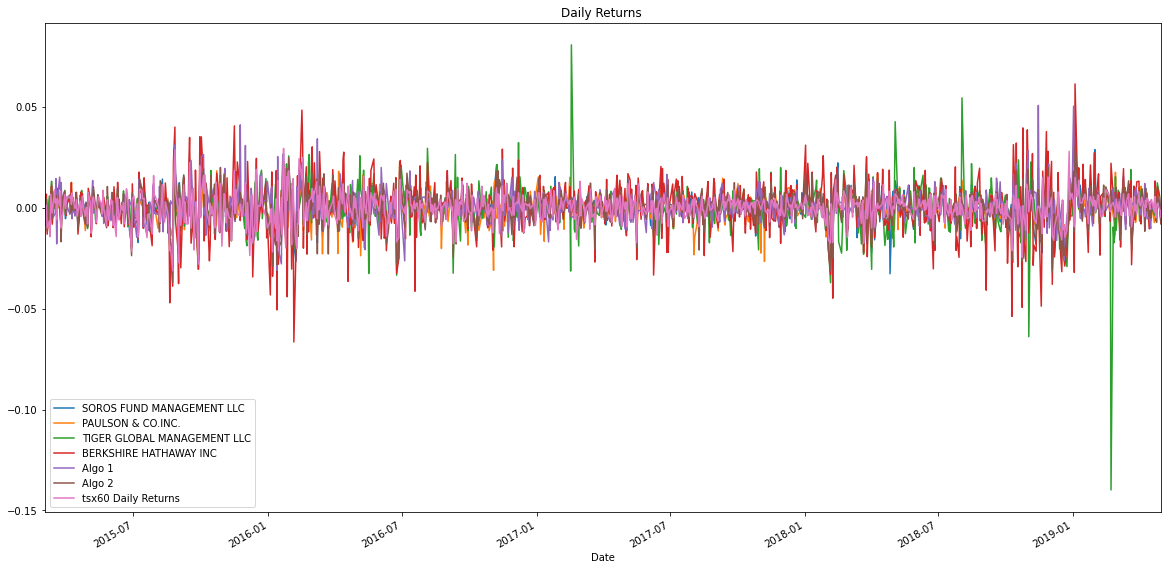

In [25]:
# Plot daily returns of all portfolios
daily_returns_df.plot(figsize=(20,10), title = "Daily Returns ")
plt.margins(x=0)


#### Calculate and Plot cumulative returns.

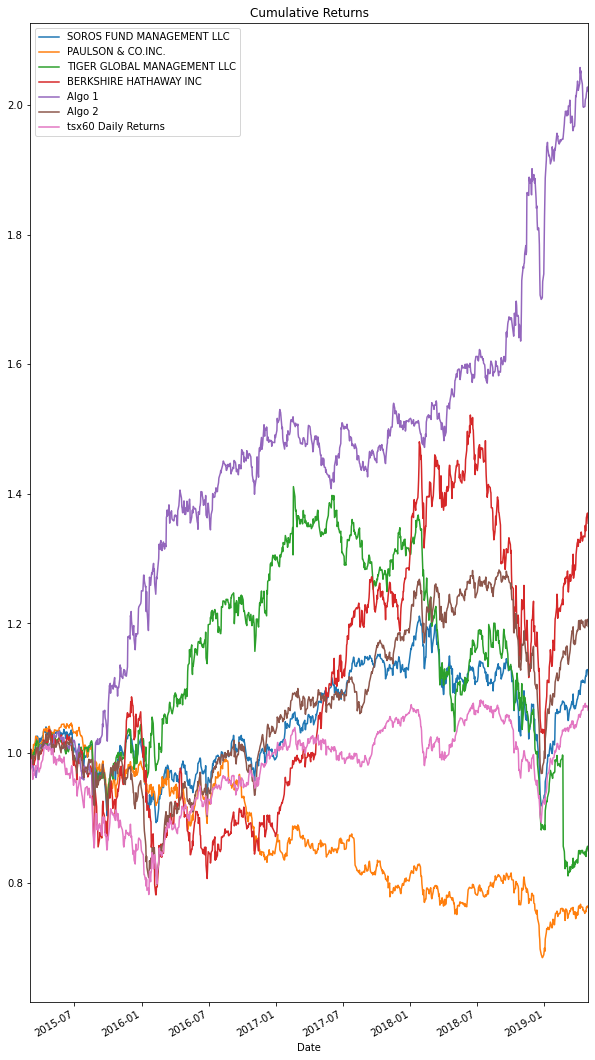

In [26]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + daily_returns_df).cumprod()

# Plot cumulative returns
cumulative_returns.plot(figsize = (10,20),title = "Cumulative Returns")
plt.margins(x=0)



---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<AxesSubplot:title={'center':'Portfolio Risk'}>

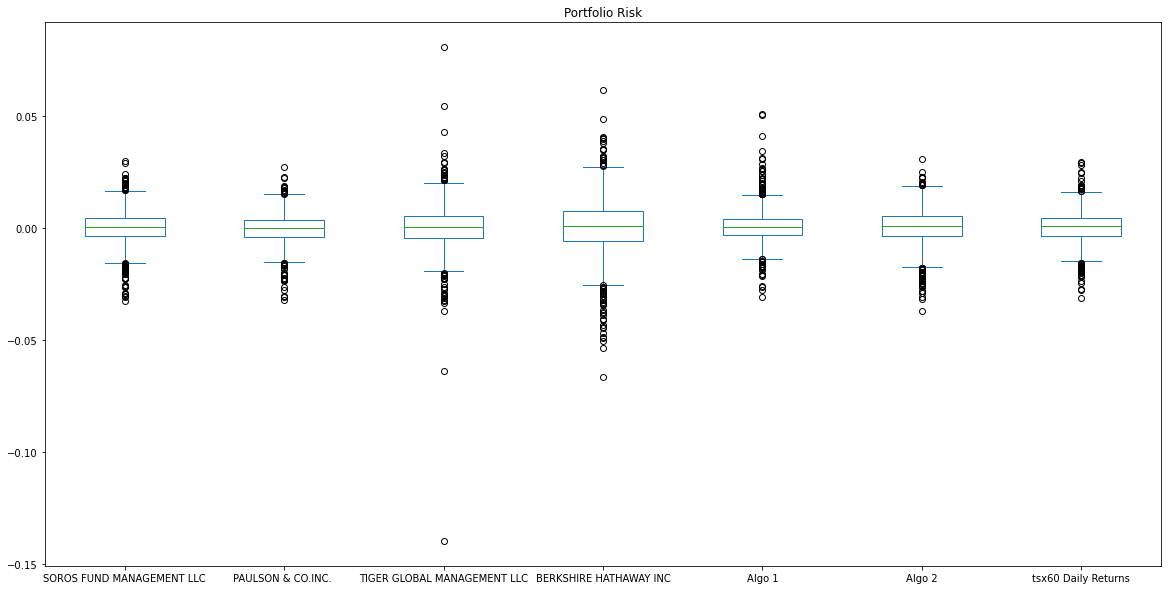

In [27]:
# Box plot to visually show risk
daily_returns_df.plot(kind = "box", figsize = (20,10), title="Portfolio Risk")

### Calculate Standard Deviations

In [28]:
# Calculate the daily standard deviations of all portfolios
daily_std_df = pd.DataFrame(daily_returns_df.std()).rename(columns = {0:"Standard Deviation"})
daily_std_df

,Standard Deviation
SOROS FUND MANAGEMENT LLC,0.007828
PAULSON & CO.INC.,0.006982
TIGER GLOBAL MANAGEMENT LLC,0.010883
BERKSHIRE HATHAWAY INC,0.012826
Algo 1,0.007589
Algo 2,0.008326
tsx60 Daily Returns,0.007034


### Determine which portfolios are riskier than the S&P TSX 60

In [37]:
# Calculate  the daily standard deviation of S&P TSX 60
higher_std = daily_std_df[daily_std_df["Standard Deviation"] > daily_std_df.loc["tsx60 Daily Returns", "Standard Deviation"]]
higher_std  
# Determine which portfolios are riskier than the S&P TSX 60


,Standard Deviation
SOROS FUND MANAGEMENT LLC,0.007828
TIGER GLOBAL MANAGEMENT LLC,0.010883
BERKSHIRE HATHAWAY INC,0.012826
Algo 1,0.007589
Algo 2,0.008326


### Calculate the Annualized Standard Deviation

In [38]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std_df = daily_std_df * np.sqrt(252)

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

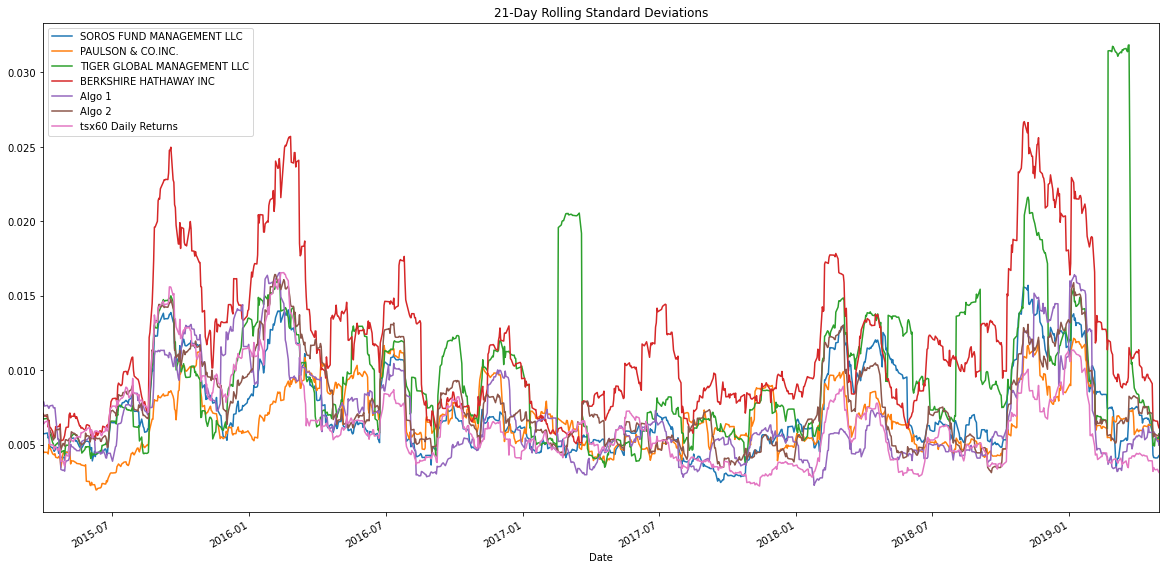

In [33]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
sp500_rolling_std = daily_returns_df.rolling(window=21).std()

# Plot the rolling standard deviation
sp500_rolling_std.plot(figsize = (20,10), title="21-Day Rolling Standard Deviations")
plt.margins(x=0)


### Calculate and plot the correlation

In [34]:
# Calculate the correlation
correlation = daily_returns_df.corr()

# Display de correlation matrix
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,tsx60 Daily Returns
SOROS FUND MANAGEMENT LLC,1.000000,0.697076,0.560964,0.750181,0.313795,0.826667,0.673930
PAULSON & CO.INC.,0.697076,1.000000,0.433034,0.540033,0.266363,0.674015,0.486511
TIGER GLOBAL MANAGEMENT LLC,0.560964,0.433034,1.000000,0.423524,0.161236,0.506689,0.440583
BERKSHIRE HATHAWAY INC,0.750181,0.540033,0.423524,1.000000,0.289378,0.684609,0.557250
Algo 1,0.313795,0.266363,0.161236,0.289378,1.000000,0.285455,0.310276
Algo 2,0.826667,0.674015,0.506689,0.684609,0.285455,1.000000,0.737370
tsx60 Daily Returns,0.673930,0.486511,0.440583,0.557250,0.310276,0.737370,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

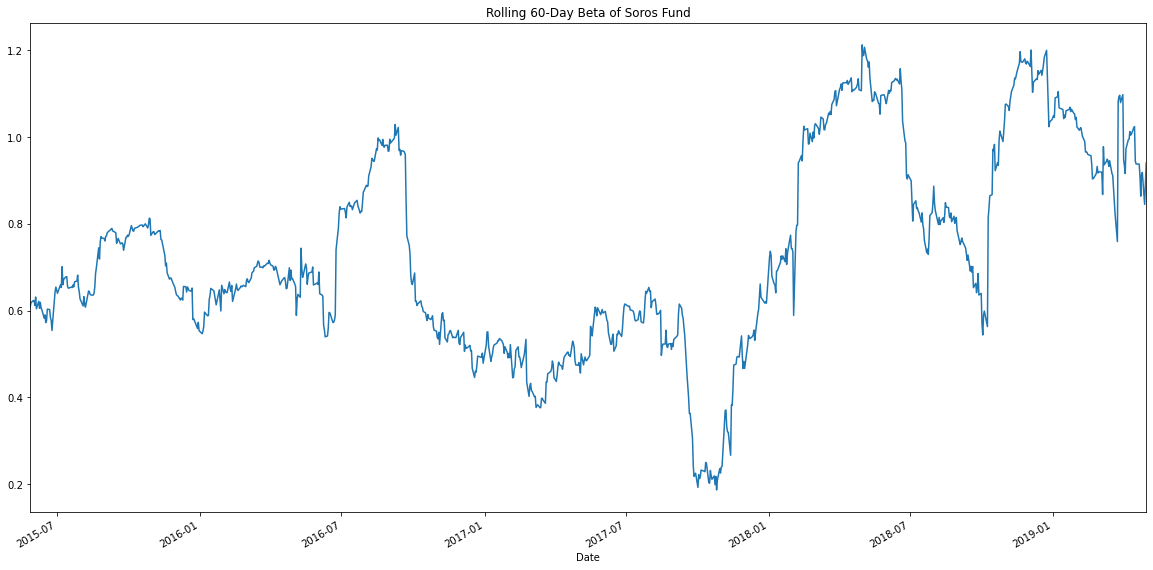

In [40]:
# Calculate covariance of a single portfolio
rolling_covariance = daily_returns_df['SOROS FUND MANAGEMENT LLC'].rolling(window=60).cov(daily_returns_df['tsx60 Daily Returns'])

# Calculate variance of S&P TSX
rolling_variance = daily_returns_df['tsx60 Daily Returns'].rolling(window=60).var()

# Computing beta
rolling_beta = rolling_covariance / rolling_variance

# Plot beta trend
rolling_beta.plot(figsize=(20, 10), title='Rolling 60-Day Beta of Soros Fund')
plt.margins(x=0)

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

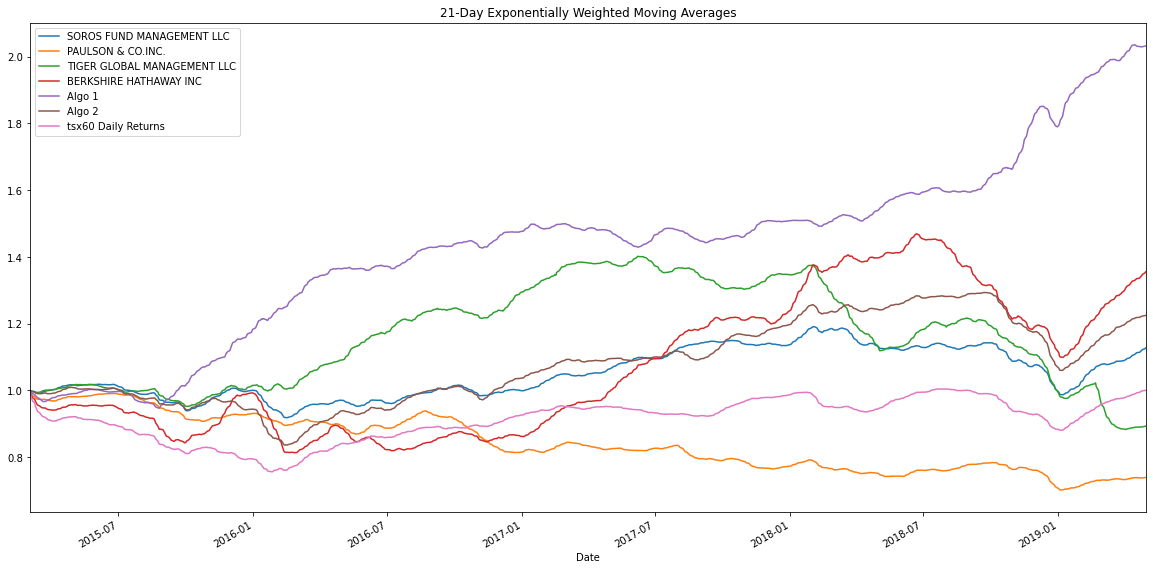

In [41]:
# Use `ewm` to calculate the rolling window
rolling_ewm = daily_returns_df.ewm(span = 21, adjust = False).mean()
(1 + rolling_ewm).cumprod().plot(figsize = (20,10), title="21-Day Exponentially Weighted Moving Averages")
plt.margins(x=0)

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [42]:
# Annualized Sharpe Ratios
annualized_sharpe_ratios = daily_returns_df.mean()*252 / (daily_returns_df.std()*np.sqrt(252))


<AxesSubplot:title={'center':'Annualized Sharpe Ratios'}>

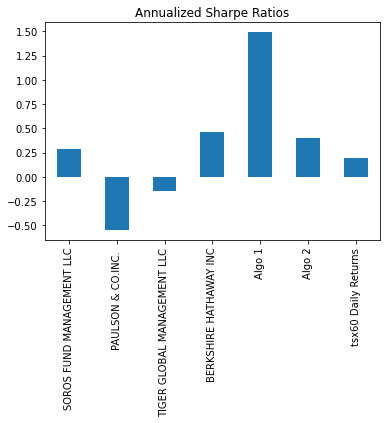

In [43]:
# Visualize the sharpe ratios as a bar plot
annualized_sharpe_ratios.plot(kind = "bar", title = "Annualized Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

> Will use the provided data in the CSV files. otex, shop and I.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [44]:
# Reading data from 1st stock 
# using Google Finance 
otex_historical_csv = "otex_historical.csv"
otex_df = pd.read_csv(otex_historical_csv,index_col = "Date",parse_dates=True, infer_datetime_format= True)



In [45]:
# Reading data from 2nd stock
shop_historical_csv = "shop_historical.csv"
shop_df = pd.read_csv(shop_historical_csv,index_col = "Date",parse_dates=True, infer_datetime_format= True)



In [46]:
# Reading data from 3rd stock
L_historical_csv = "L_historical.csv"
L_df = pd.read_csv(L_historical_csv,index_col = "Date",parse_dates=True, infer_datetime_format= True)



In [58]:
# Combine all stocks in a single DataFrame
my_shares_df = pd.concat([otex_df,shop_df,L_df],axis = 'columns', join = 'inner' )
my_shares_df.head()

,Otex Close,Shop Close,L Close
Date,,,
2018-01-02,43.58,132.06,57.99
2018-01-03,43.07,135.15,57.41
2018-01-04,42.91,137.46,57.42
2018-01-05,42.57,137.26,57.42
2018-01-08,42.16,139.51,56.86


In [59]:
# Reset Date index
my_shares_df.sort_index(ascending=True, inplace= True)

In [ ]:
# Reorganize portfolio data by having a column per symbol

# for better output and cleaner structure of data, we will drop the symbol column and rename it 
otex_df = otex_df.drop('Symbol', axis=1)
otex_df.columns = ["Otex Close"]

shop_df = shop_df.drop('Symbol', axis=1)
shop_df.columns = ["Shop Close"]

L_df = L_df.drop('Symbol', axis=1)
L_df.columns = ["L Close"]

In [61]:
# Calculate daily returns

# Drop NAs
my_shares_df.dropna()

# Display sample data
my_shares_df.head()

,Otex Close,Shop Close,L Close
Date,,,
2018-01-02,43.58,132.06,57.99
2018-01-03,43.07,135.15,57.41
2018-01-04,42.91,137.46,57.42
2018-01-05,42.57,137.26,57.42
2018-01-08,42.16,139.51,56.86


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [62]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
my_portfolio_returns = my_shares_df.pct_change().dot(weights)

# drop null
my_portfolio_returns.dropna(inplace=True)

# Display sample data
my_portfolio_returns.head()

Date
2018-01-03    0.000565
2018-01-04    0.004517
2018-01-05   -0.003126
2018-01-08   -0.000997
2018-01-09   -0.000999
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [63]:
# Join your returns DataFrame to the original returns DataFrame
total_portfolio_returns_df = pd.concat([my_portfolio_returns,daily_returns_df],axis = 'columns', join = 'inner')

# rename the columns for the new custom portfolio
total_portfolio_returns_df.rename(columns = {0:"SHOP/OTEX/L"}, inplace = True)



In [64]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
total_portfolio_returns_df.dropna(inplace= True)
total_portfolio_returns_df.head()

,SHOP/OTEX/L,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,tsx60 Daily Returns
Date,,,,,,,,
2018-01-03,0.000565,0.004658,0.000027,0.001979,0.005676,-0.000890,0.008175,0.003774
2018-01-04,0.004517,-0.000914,0.004196,0.010743,0.004065,-0.000914,0.004294,0.002528
2018-01-05,-0.003126,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,-0.003869
2018-01-08,-0.000997,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,-0.001944
2018-01-09,-0.000999,-0.001028,0.000872,0.001789,0.000708,-0.001004,-0.002091,0.000097


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [65]:
# Calculate the annualized `std`
total_portfolio_std = pd.DataFrame(total_portfolio_returns_df.std()).rename(columns = {0:"Standard Deviation"})
total_portfolio_std = total_portfolio_std.sort_values(by='Standard Deviation', ascending=False)
total_portfolio_std

,Standard Deviation
BERKSHIRE HATHAWAY INC,0.014328
SHOP/OTEX/L,0.014132
TIGER GLOBAL MANAGEMENT LLC,0.013848
SOROS FUND MANAGEMENT LLC,0.009177
Algo 2,0.008672
Algo 1,0.007561
PAULSON & CO.INC.,0.007203
tsx60 Daily Returns,0.006244


### Calculate and plot rolling `std` with 21-day window

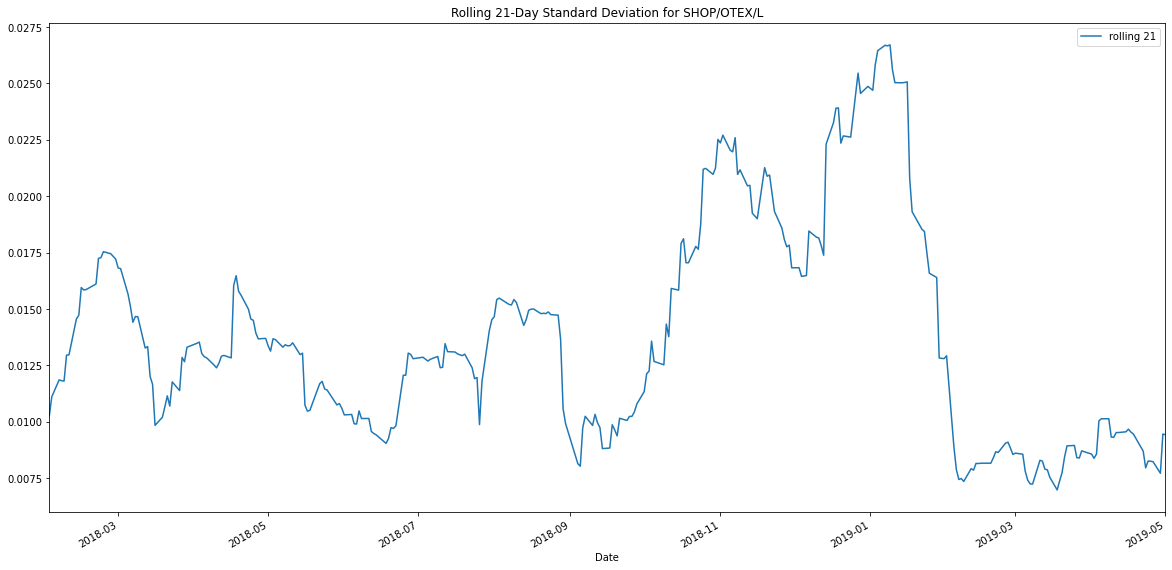

In [66]:
# Calculate rolling standard deviation
my_portfolio_rolling = total_portfolio_returns_df[["SHOP/OTEX/L"]].rolling(window = 21).std()
ax = my_portfolio_rolling.plot(figsize = (20,10), title = 'Rolling 21-Day Standard Deviation for SHOP/OTEX/L')
ax.legend(["rolling 21"]);
plt.margins(x=0)
# Plot rolling standard deviation


### Calculate and plot the correlation

In [67]:
# Calculate and plot the correlation
correlation = total_portfolio_returns_df.corr()
correlation

,SHOP/OTEX/L,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,tsx60 Daily Returns
SHOP/OTEX/L,1.000000,0.556093,0.385305,0.303971,0.647413,0.214770,0.563756,0.579228
SOROS FUND MANAGEMENT LLC,0.556093,1.000000,0.764174,0.526710,0.782414,0.305525,0.834431,0.686681
PAULSON & CO.INC.,0.385305,0.764174,1.000000,0.536534,0.647407,0.320568,0.797494,0.623728
TIGER GLOBAL MANAGEMENT LLC,0.303971,0.526710,0.536534,1.000000,0.384316,0.130845,0.485258,0.438781
BERKSHIRE HATHAWAY INC,0.647413,0.782414,0.647407,0.384316,1.000000,0.294696,0.783254,0.649817
Algo 1,0.214770,0.305525,0.320568,0.130845,0.294696,1.000000,0.321837,0.284789
Algo 2,0.563756,0.834431,0.797494,0.485258,0.783254,0.321837,1.000000,0.754326
tsx60 Daily Returns,0.579228,0.686681,0.623728,0.438781,0.649817,0.284789,0.754326,1.000000


### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

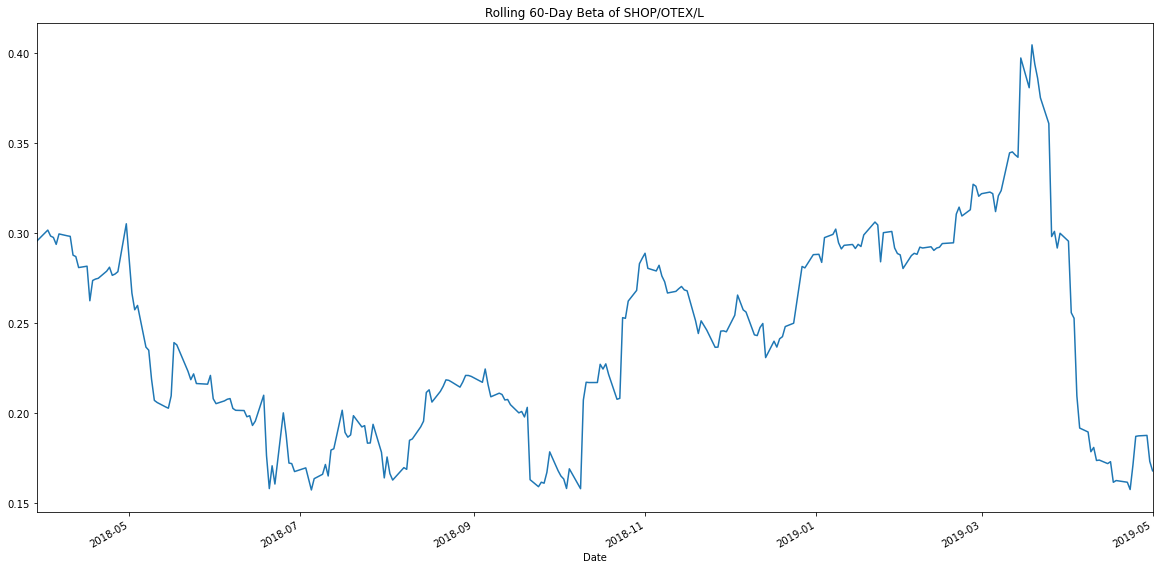

In [69]:
# Calculate and plot Beta
rolling_covariance = total_portfolio_returns_df['SHOP/OTEX/L'].rolling(window=60).cov(total_portfolio_returns_df['tsx60 Daily Returns'])
rolling_variance = total_portfolio_returns_df['SHOP/OTEX/L'].rolling(window=60).var()
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(20, 10), title='Rolling 60-Day Beta of SHOP/OTEX/L')
plt.margins(x=0)

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [70]:
# Calculate Annualized Sharpe Ratios
my_portfolio_annualized_sharpe_ratios = total_portfolio_returns_df.mean() * 252 / (total_portfolio_returns_df.std() * np.sqrt(252))

# Sort Sharpe Ratios & Drop nulls
my_portfolio_annualized_sharpe_ratios_sorted = my_portfolio_annualized_sharpe_ratios.sort_values(ascending=False)
my_portfolio_annualized_sharpe_ratios_sorted.dropna(inplace=True)
my_portfolio_annualized_sharpe_ratios_sorted

Algo 1                         1.901461
SHOP/OTEX/L                    1.564547
BERKSHIRE HATHAWAY INC         0.195907
tsx60 Daily Returns            0.034651
Algo 2                         0.021394
SOROS FUND MANAGEMENT LLC     -0.088196
PAULSON & CO.INC.             -0.396282
TIGER GLOBAL MANAGEMENT LLC   -1.391612
dtype: float64

<AxesSubplot:title={'center':'Annualized Sharpe Ratios'}>

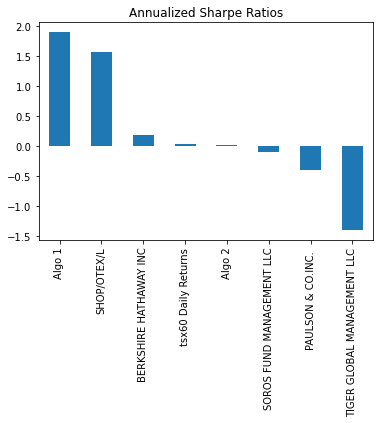

In [71]:
# Visualize the sharpe ratios as a bar plot

my_portfolio_annualized_sharpe_ratios_sorted.plot(kind = "bar", title = "Annualized Sharpe Ratios")

### How does your portfolio do?

Write your answer here!

>The above calculations, including the Rolling Beta plot of my custom portfolio of SHOP/OTEX/L explains a lot about the volatility of the portfolio. 
A beta of 1 indicates that the security's price tends to move with the market; a beta greater than 1 indicates that the security's price tends to be 
more volatile than the market; a beta of less than 1 means it tends to be less volatile than the market. 
We see that for the entir 1-year timeframe, the portfolio is less volatile than the overall market, staying at a rolling beta of less than 1. This indicates that the portfolio is not in fact sensitive to movements in the S&P 60 TSX.